In [43]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [44]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [45]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools


/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [46]:
BR_nc = nc.Dataset('MASSBAL_BR2015_to1231_spunup.nc')
PI_nc = nc.Dataset('MASSBAL_PI2015_to1231_spunup.nc')

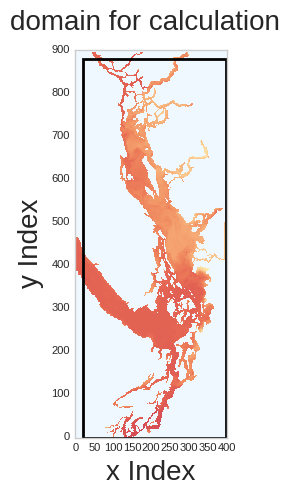

In [47]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [48]:
stor_mol_BR = BR_nc['model_output']['stor_mol_BR']
stor_mol_surf_BR = BR_nc['model_output']['stor_mol_surf_BR']
stor_20_BR = BR_nc['model_output']['stor_mol_20_BR']
stor_20_100_BR = BR_nc['model_output']['stor_mol_20_100_BR']
stor_deep_BR = BR_nc['model_output']['stor_mol_deep_BR']
stor_flx_BR = BR_nc['model_output']['stor_flx_BR']
stor_trans_BR =BR_nc['model_output']['stor_trans_BR']
stor_trans_BR_JS =BR_nc['model_output']['stor_trans_BR_JS']

ts_BR = np.arange(0,np.size(stor_trans_BR),1)


stor_mol_PI = PI_nc['model_output']['stor_mol_PI']
stor_mol_surf_PI = PI_nc['model_output']['stor_mol_surf_PI']
stor_20_PI = PI_nc['model_output']['stor_mol_20_PI']
stor_20_100_PI = PI_nc['model_output']['stor_mol_20_100_PI']
stor_deep_PI = PI_nc['model_output']['stor_mol_deep_PI']
stor_flx_PI = PI_nc['model_output']['stor_flx_PI']
stor_trans_PI =PI_nc['model_output']['stor_trans_PI']
stor_trans_PI_JS =PI_nc['model_output']['stor_trans_PI_JS']

ts_PI = np.arange(0,np.size(stor_trans_BR),1)

In [49]:
stor_flx_ar = stor_flx_BR[:]

flux_sorted = np.sort(stor_flx_ar)
largeflux_1_out = flux_sorted[0]
largeflux_2_out = flux_sorted[1]
date_1_out = np.where(stor_flx_ar == largeflux_1_out)
date_2_out = np.where(stor_flx_ar == largeflux_2_out)
#
largeflux_1_in = flux_sorted[len(flux_sorted)-1]
largeflux_2_in = flux_sorted[len(flux_sorted)-2]
date_1_in = np.where(stor_flx_ar == largeflux_1_in)
date_2_in = np.where(stor_flx_ar == largeflux_2_in)


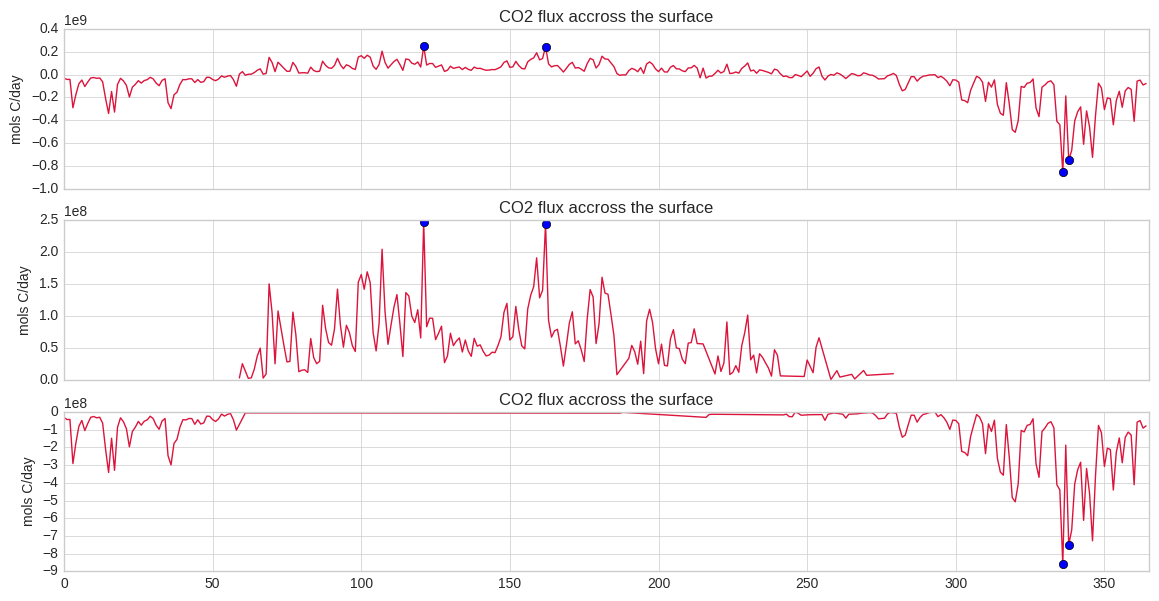

In [50]:
fig = plt.figure(figsize=(10*1.4,5*1.4))

ax = fig.add_subplot(3,1,1)
ax.plot(ts_BR,stor_flx_ar,color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_in,largeflux_1_in, color = 'blue', marker = 'o')
ax.plot(date_2_in,largeflux_2_in, color = 'blue', marker = 'o')
ax.plot(date_1_out,largeflux_1_out, color = 'blue', marker = 'o')
ax.plot(date_2_out,largeflux_2_out, color = 'blue', marker = 'o')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(ts_BR[stor_flx_ar>0],stor_flx_ar[stor_flx_ar>0],color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_in,largeflux_1_in, color = 'blue', marker = 'o')
ax.plot(date_2_in,largeflux_2_in, color = 'blue', marker = 'o')

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,3)
ax.plot(ts_BR[stor_flx_ar<0],stor_flx_ar[stor_flx_ar<0],color = 'crimson',label = '2015 2nd BR year')
ax.plot(date_1_out,largeflux_1_out, color = 'blue', marker = 'o')
ax.plot(date_2_out,largeflux_2_out, color = 'blue', marker = 'o')
plt.xlim([0,365])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

In [51]:
def get_dates(start,end,ftype, sdir):
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    dddd_ar = []
    ddmmmyy_ar = []
    sens_ar =[]
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        dddd_ar.append(dddd)
        ddmmmyy_ar.append(ddmmmyy)
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
    return sens_ar, dddd_ar, ddmmmyy_ar

In [52]:
start = '2015-01-01'
end = '2015-12-31'
sdir = '/data/tjarniko/results/BR_2nd_2015_cop/SKOG_2/ncs/'
ftype = 'carp'
ftype2 = 'grid_T'

sens_ar_carp, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype, sdir)
sens_ar_grid, dddd_ar, ddmmmyy_ar = get_dates(start,end,ftype2, sdir)

In [53]:
lf_dates = [date_1_in[0][0],date_2_in[0][0], date_1_out[0][0], date_2_out[0][0]]
lf_carps = []
lf_grids = []
lf_hrdates = []

for i in range(0,len(lf_dates)):
    lf_carps.append(sens_ar_carp[lf_dates[i]])
    lf_grids.append(sens_ar_grid[lf_dates[i]])
#     print()
#     print(lf_dates[i])
    t_date = lf_dates[i]
    lf_hrdates.append(ddmmmyy_ar[t_date])
#     print(lf_hrdates[i])
#     print(dddd_ar[t_date])
# #     print(lf_carps[i])
# #     print(lf_grids[i])

In [54]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm):

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    #tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

0
1
2
3


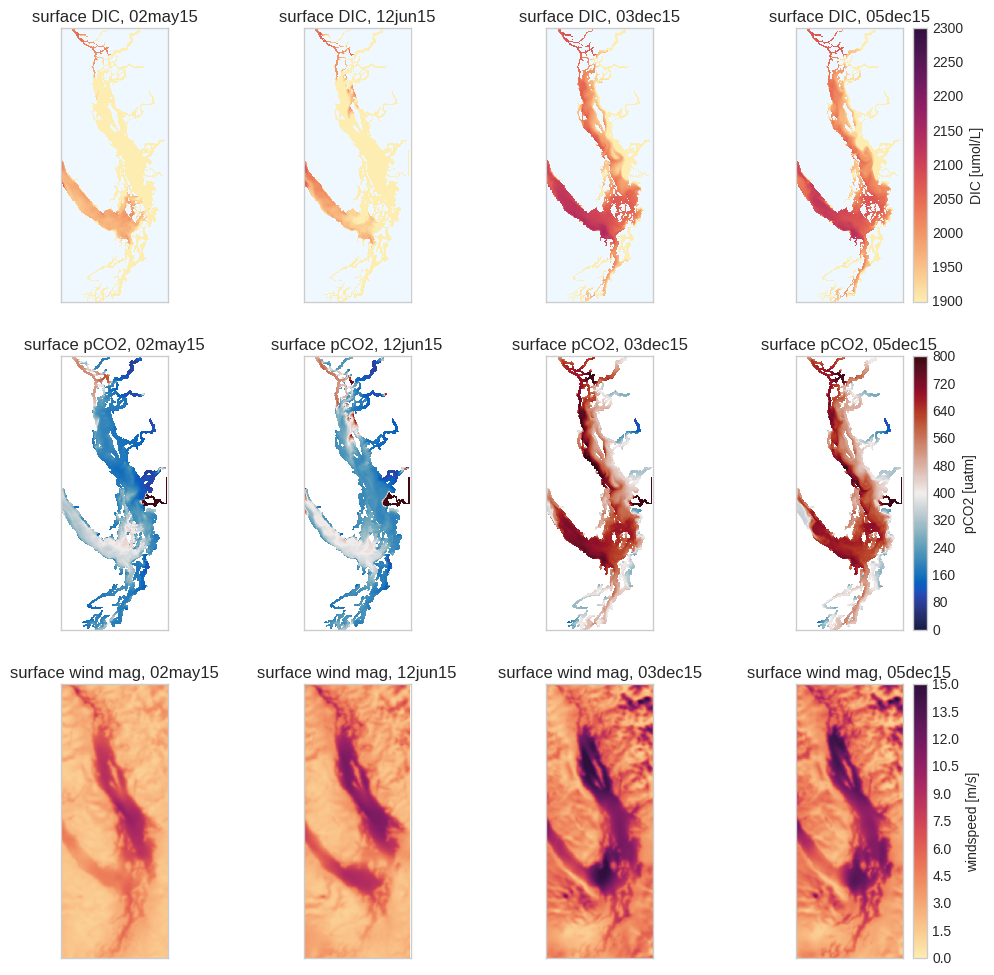

In [55]:

fig = plt.figure(figsize=(12,12))
for i in range(0,4):
    print(i)
    t_nc = nc.Dataset(lf_carps[i])
    t_ncg = nc.Dataset(lf_grids[i])
    tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
    tta = t_nc['total_alkalinity'][0,0,:,:]
    ttemp = t_ncg['votemper'][0,0,:,:]
    tsal = t_ncg['vosaline'][0,0,:,:]
    pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)
    
    #winds
    w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
    twind = w['daily_avg_windmag'][:][:]
    
    ax = fig.add_subplot(3,4,(i)+1)
    t_cmap = cm.cm.matter
    t_vmin = 1900
    t_vmax = 2300
    tplt = np.ma.masked_values(tdic,0)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    viz_tools.set_aspect(ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('surface DIC, '+lf_hrdates[i])
    if i == 3:
        cbar = plt.colorbar(mesh)
        cbar.set_label('DIC [umol/L]')
    
    ax = fig.add_subplot(3,4,(i)+5)
    t_cmap = cm.cm.balance
    t_vmin = 0
    t_vmax = 800
    tplt = np.ma.masked_values(pco2r,1e20)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    viz_tools.set_aspect(ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('surface pCO2, '+lf_hrdates[i])
    if i == 3:
        cbar = plt.colorbar(mesh)
        cbar.set_label('pCO2 [uatm]')
        
    ax = fig.add_subplot(3,4,(i)+9)
    t_cmap = cm.cm.matter
    t_vmin = 0
    t_vmax = 15
    tplt = np.ma.masked_values(twind,0)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    viz_tools.set_aspect(ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('surface wind mag, '+lf_hrdates[i])
    if i == 3:
        cbar = plt.colorbar(mesh)
        cbar.set_label('windspeed [m/s]')

## SUMMER = flux in

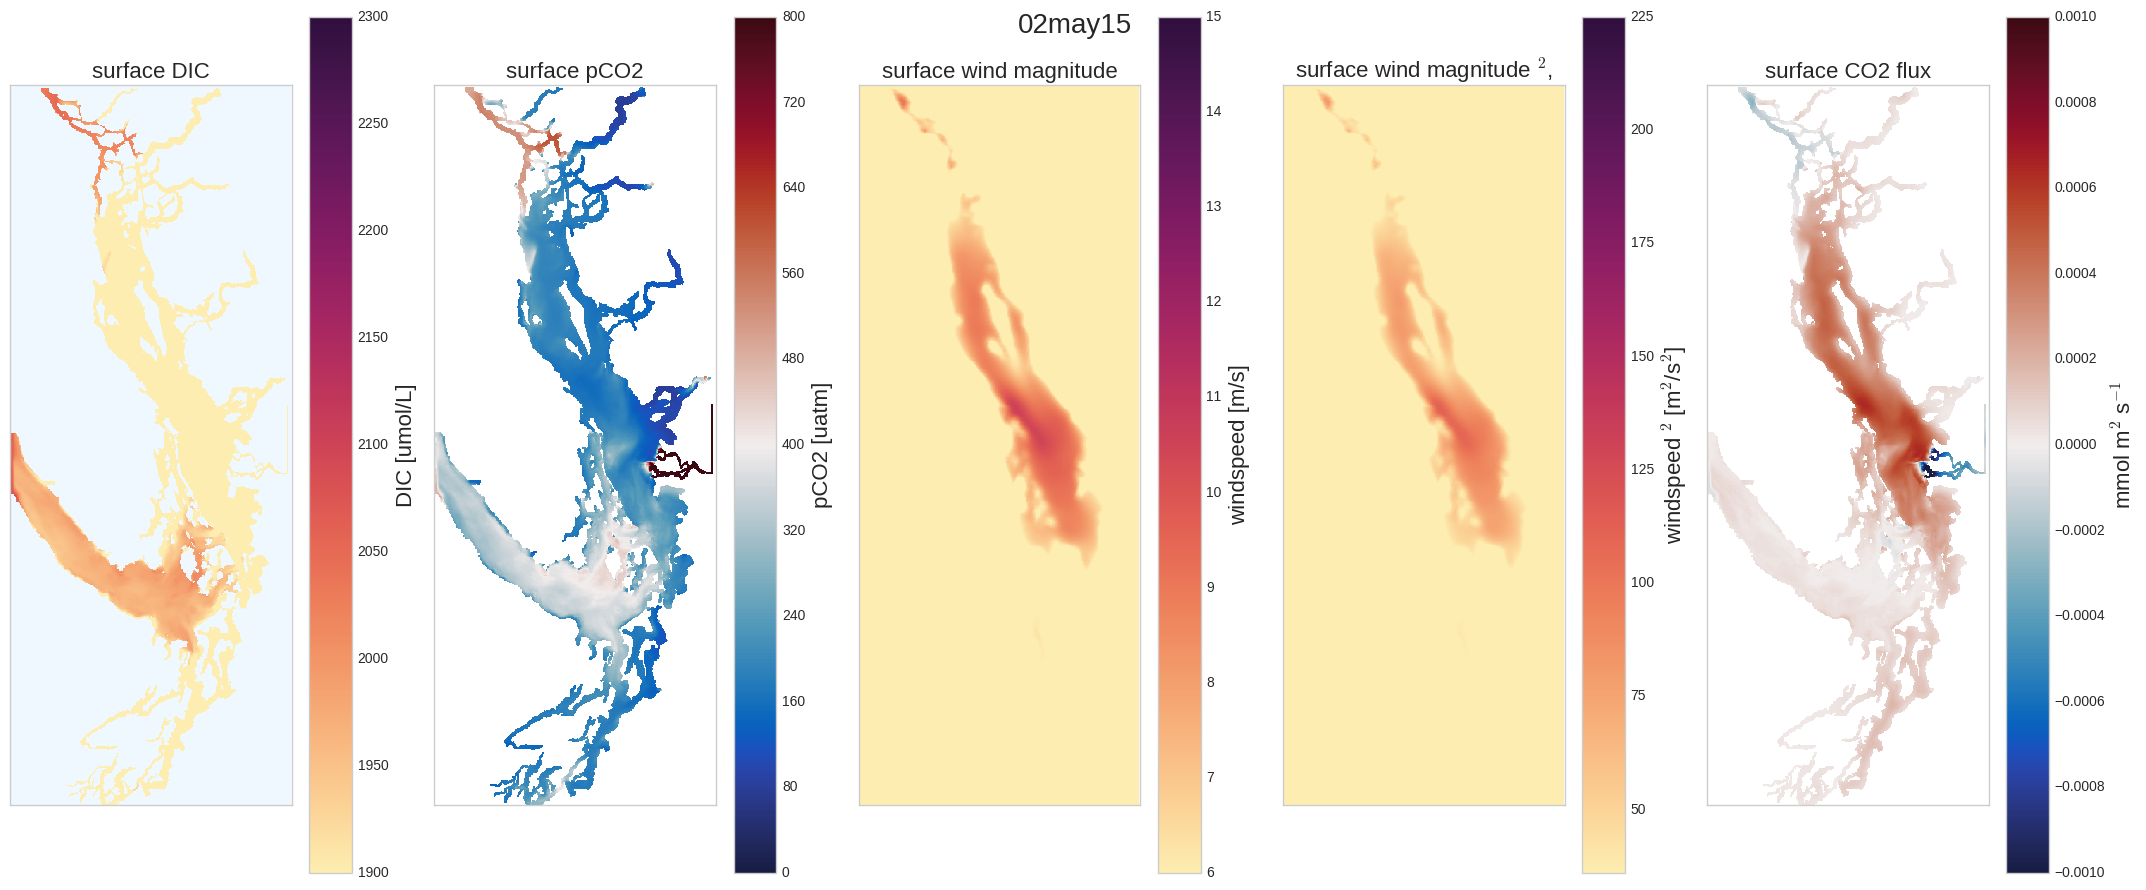

In [56]:

fig = plt.figure(figsize=(12*1.8,5*1.8))
i = 0
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,5,1)
t_cmap = cm.cm.matter
t_vmin = 1900
t_vmax = 2300
tplt = np.ma.masked_values(tdic,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface DIC', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('DIC [umol/L]', fontsize = 16)

ax = fig.add_subplot(1,5,2)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 [uatm]', fontsize = 16)

ax = fig.add_subplot(1,5,3)
t_cmap = cm.cm.matter
t_vmin = 6
t_vmax = 15
tplt = np.ma.masked_values(twind,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed [m/s]', fontsize = 16)

ax = fig.add_subplot(1,5,4)
t_cmap = cm.cm.matter
t_vmin = 6**2
t_vmax = 15**2
tplt = np.ma.masked_values(twind**2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

ax = fig.add_subplot(1,5,5)
t_cmap = cm.cm.balance
t_vmin = 0.001
t_vmax = -0.001
tplt = np.ma.masked_values(tco2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface CO2 flux', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

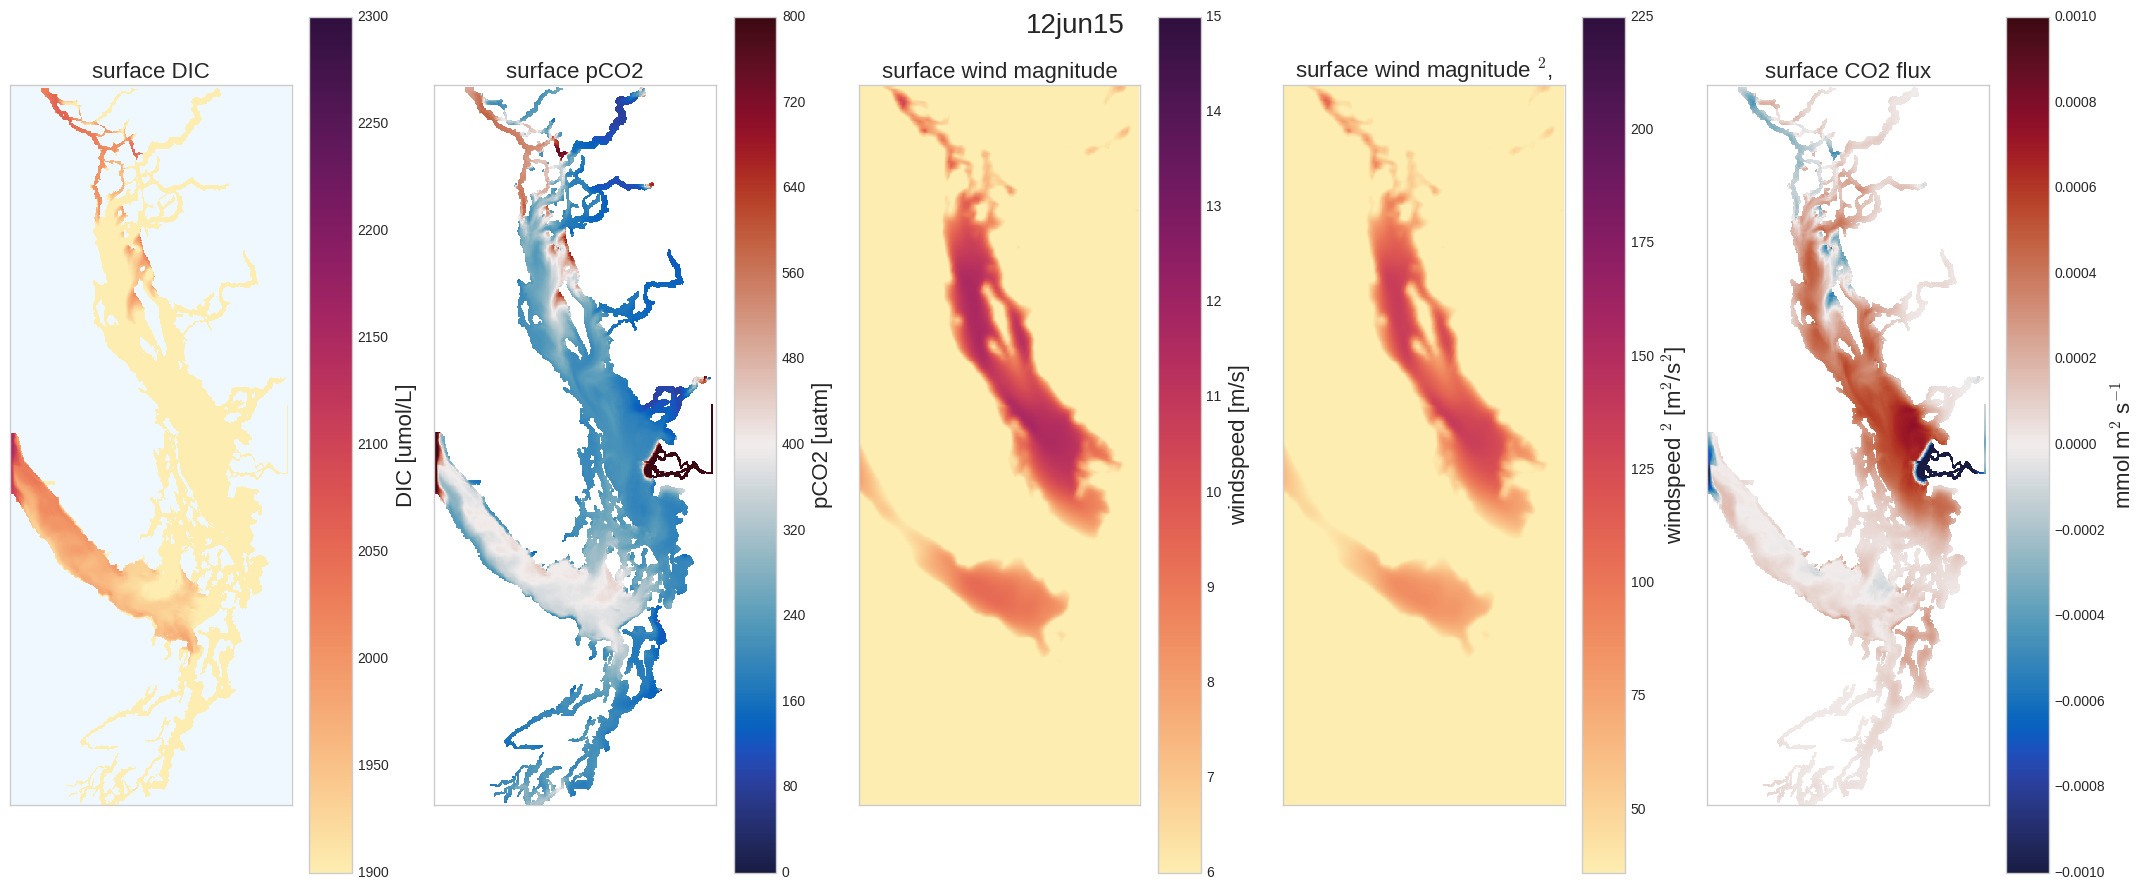

In [57]:

fig = plt.figure(figsize=(12*1.8,5*1.8))
i = 1
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,5,1)
t_cmap = cm.cm.matter
t_vmin = 1900
t_vmax = 2300
tplt = np.ma.masked_values(tdic,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface DIC', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('DIC [umol/L]', fontsize = 16)

ax = fig.add_subplot(1,5,2)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 [uatm]', fontsize = 16)

ax = fig.add_subplot(1,5,3)
t_cmap = cm.cm.matter
t_vmin = 6
t_vmax = 15
tplt = np.ma.masked_values(twind,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed [m/s]', fontsize = 16)

ax = fig.add_subplot(1,5,4)
t_cmap = cm.cm.matter
t_vmin = 6**2
t_vmax = 15**2
tplt = np.ma.masked_values(twind**2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

ax = fig.add_subplot(1,5,5)
t_cmap = cm.cm.balance
t_vmin = 0.001
t_vmax = -0.001
tplt = np.ma.masked_values(tco2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface CO2 flux', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

## WINTER - FLUX OUT

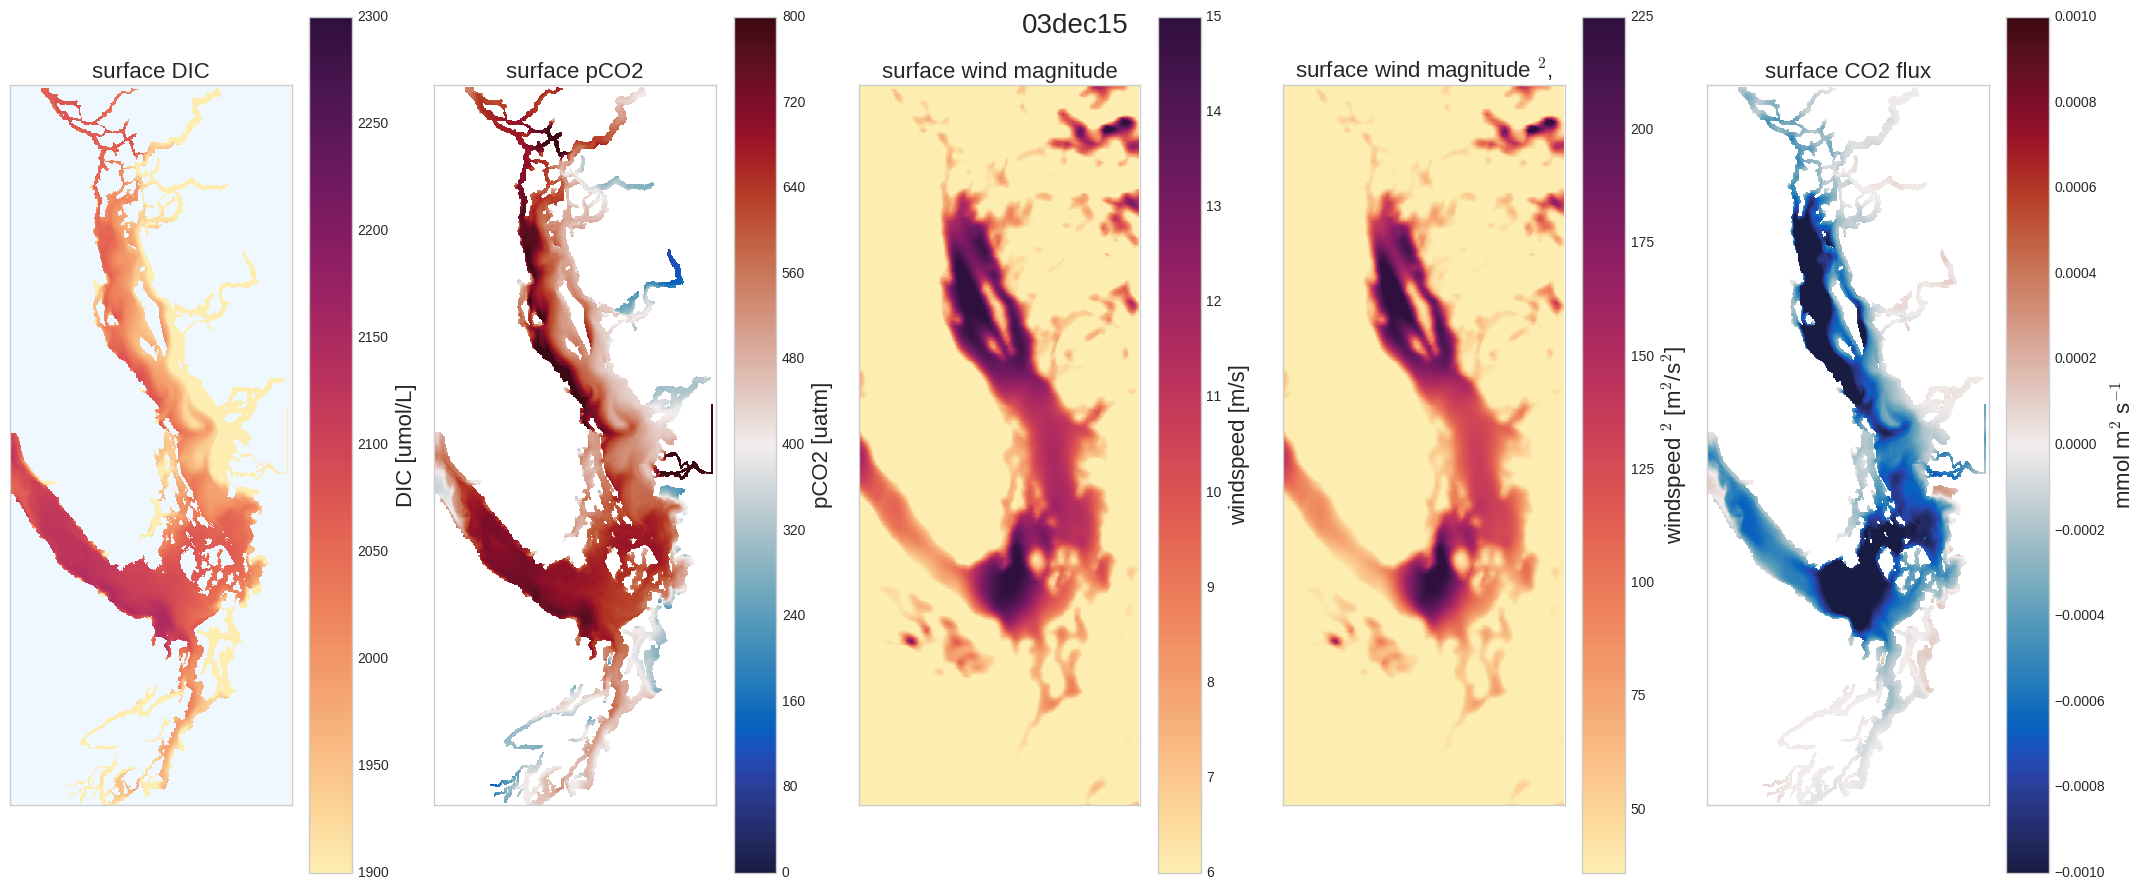

In [58]:

fig = plt.figure(figsize=(12*1.8,5*1.8))
i = 2
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,5,1)
t_cmap = cm.cm.matter
t_vmin = 1900
t_vmax = 2300
tplt = np.ma.masked_values(tdic,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface DIC', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('DIC [umol/L]', fontsize = 16)

ax = fig.add_subplot(1,5,2)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 [uatm]', fontsize = 16)

ax = fig.add_subplot(1,5,3)
t_cmap = cm.cm.matter
t_vmin = 6
t_vmax = 15
tplt = np.ma.masked_values(twind,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed [m/s]', fontsize = 16)

ax = fig.add_subplot(1,5,4)
t_cmap = cm.cm.matter
t_vmin = 6**2
t_vmax = 15**2
tplt = np.ma.masked_values(twind**2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

ax = fig.add_subplot(1,5,5)
t_cmap = cm.cm.balance
t_vmin = 0.001
t_vmax = -0.001
tplt = np.ma.masked_values(tco2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface CO2 flux', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

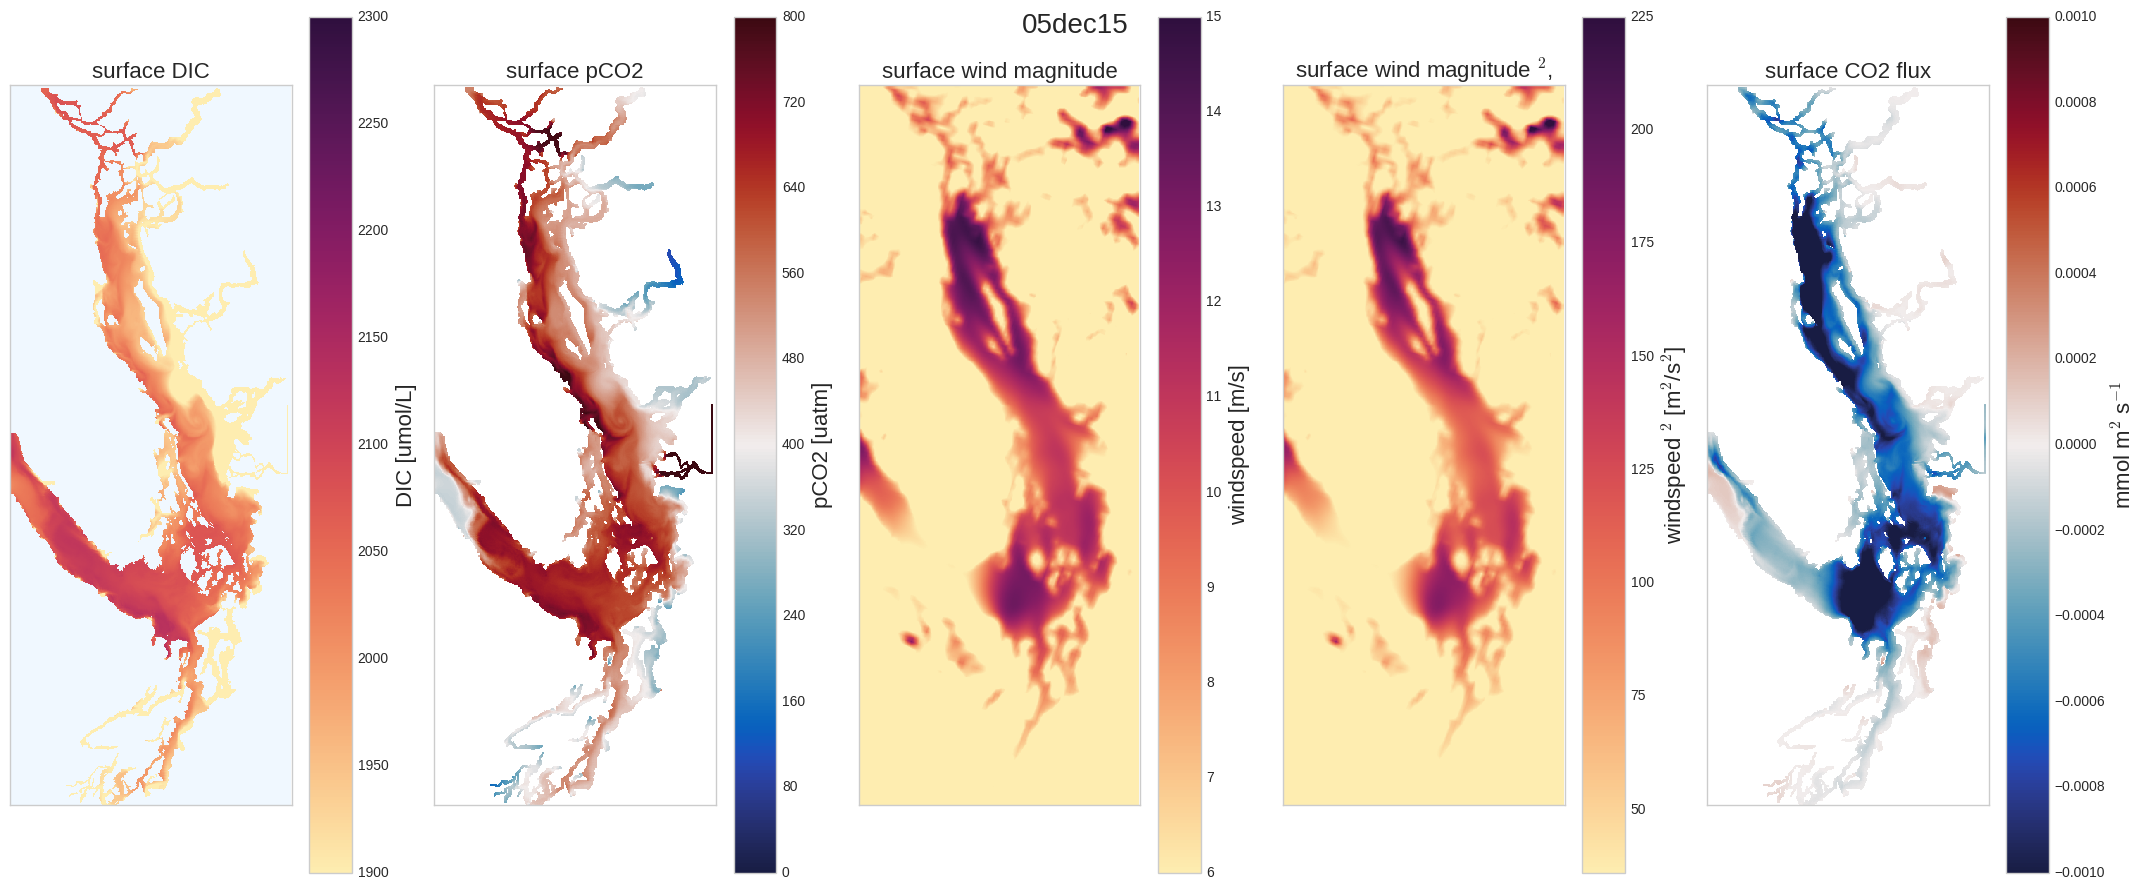

In [59]:

fig = plt.figure(figsize=(12*1.8,5*1.8))
i = 3
t_nc = nc.Dataset(lf_carps[i])
t_ncg = nc.Dataset(lf_grids[i])
tdic = t_nc['dissolved_inorganic_carbon'][0,0,:,:]
tco2 = t_nc['co2_flux_mmol_m2_s'][0,:,:]

tta = t_nc['total_alkalinity'][0,0,:,:]
ttemp = t_ncg['votemper'][0,0,:,:]
tsal = t_ncg['vosaline'][0,0,:,:]
pHr, OmAr, pco2r = oned_moxy(tsal, ttemp, tdic, tta, 1)

#winds
w = nc.Dataset('/ocean/tjarniko/MEOPAR/WINDFILES_interp/YEAR2015_day' + str(lf_dates[i]) +'.nc')
twind = w['daily_avg_windmag'][:][:]

ax = fig.add_subplot(1,5,1)
t_cmap = cm.cm.matter
t_vmin = 1900
t_vmax = 2300
tplt = np.ma.masked_values(tdic,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface DIC', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('DIC [umol/L]', fontsize = 16)

ax = fig.add_subplot(1,5,2)
t_cmap = cm.cm.balance
t_vmin = 0
t_vmax = 800
tplt = np.ma.masked_values(pco2r,1e20)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface pCO2', fontsize = 16)
cbar = plt.colorbar(mesh)
cbar.set_label('pCO2 [uatm]', fontsize = 16)

ax = fig.add_subplot(1,5,3)
t_cmap = cm.cm.matter
t_vmin = 6
t_vmax = 15
tplt = np.ma.masked_values(twind,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed [m/s]', fontsize = 16)

ax = fig.add_subplot(1,5,4)
t_cmap = cm.cm.matter
t_vmin = 6**2
t_vmax = 15**2
tplt = np.ma.masked_values(twind**2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface wind magnitude $^2$,', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('windspeed $^2$ [m$^2$/s$^2$]', fontsize = 16)

ax = fig.add_subplot(1,5,5)
t_cmap = cm.cm.balance
t_vmin = 0.001
t_vmax = -0.001
tplt = np.ma.masked_values(tco2,0)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
viz_tools.set_aspect(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title('surface CO2 flux', fontsize = 16)

cbar = plt.colorbar(mesh)
cbar.set_label('mmol m${^2}$ s$^{-1}$', fontsize = 16)

plt.suptitle(lf_hrdates[i], fontsize = 20)
plt.tight_layout()

In [60]:
#thresholding code~

# abs_flux = np.abs(stor_flx_BR)
# large0pt2_flux_day = np.where(abs_flux > 0.2e9)
# large0pt2_flux_day = np.where(abs_flux > 0.2e9)


# ts_pos = ts_BR[stor_flx_ar>0]
# flx_ar_pos = stor_flx_ar[stor_flx_ar>0]

# flx_ar_thres = flx_ar_pos[flx_ar_pos>0.15e9]
# np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
# total_pos_days = np.size(flx_ar_pos)
# for i in range(1,12):
#     thres = i*0.025*1e9
#     print('')
#     print('threshold flux: '+str(thres/1e9))
#     flx_ar_thres = flx_ar_pos[flx_ar_pos>thres]
#     perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_pos)
#     days_thres = np.size(flx_ar_thres)
#     perc_days = days_thres/total_pos_days *100
#     print('% days at thres: '+str(perc_days))
#     print('% flux accounted for: '+str(perc_flx))


# ts_neg = ts_BR[stor_flx_ar<0]
# flx_ar_neg = stor_flx_ar[stor_flx_ar<0]
# late_wind_ev = stor_flx_ar[338:348]
# perc_flx = np.sum(late_wind_ev)/np.sum(flx_ar_neg) *100
# print('perc flux late wind ev:'+str(perc_flx))
# print(np.size(flx_ar_neg))

# total_neg_days = np.size(flx_ar_neg)
# for i in range(1,7):
#     thres = -1*i*0.05*1e9
#     print('')
#     print('threshold flux: '+str(thres/1e9))
#     flx_ar_thres = flx_ar_neg[flx_ar_neg<thres]
#     perc_flx = np.sum(flx_ar_thres)/np.sum(flx_ar_neg) *100
#     days_thres = np.size(flx_ar_thres)
#     perc_days = days_thres/total_neg_days *100
#     print('% days at thres: '+str(perc_days))
#     print('% flux accounted for: '+str(perc_flx))
